#### https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

#### https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

#### https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/

In [93]:
import pandas as pd

In [109]:
data = pd.read_csv("D:\Passenger_Data\passengers.csv",usecols=[1])

In [110]:
data.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


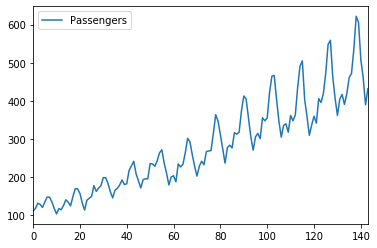

In [111]:
import matplotlib.pyplot as plt
data.plot()

In [112]:
passengers = data.values.astype('float32')

In [113]:
from sklearn.preprocessing import MinMaxScaler

In [115]:
len(dataset)

144

In [116]:
train = dataset[:100]
test = dataset[100:]

In [117]:
train.shape

(100, 1)

In [121]:
import numpy as np
def create_dataset(dataset,lookback=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-1-lookback):
        a=dataset[i:(i+lookback),0]
        dataX.append(a)
        b=dataset[i+lookback,0]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

In [126]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(passengers)

In [138]:
X_train,y_train = create_dataset(passengers[1:5],1)

In [142]:
X_train

array([[118.],
       [132.]], dtype=float32)

In [141]:
passengers[1:5]

array([[118.],
       [132.],
       [129.],
       [121.]], dtype=float32)

In [135]:
X_train.shape,y_train.shape

((0,), (0,))

In [85]:
X_test,y_test = create_dataset(test,1)

In [86]:
# samples,time step, feature
X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])

In [87]:
X_train.shape

(98, 1, 1)

In [88]:
from keras.models import Model

In [89]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [90]:
y_train.shape,X_train.shape,type(y_train),type(X_train)

((98,), (98, 1, 1), numpy.ndarray, numpy.ndarray)

In [91]:
y_train

array([array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557,
       0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ,
       0.02702703, 0.02123553, 0.04247104, 0.07142857, 0.05984557,
       0.04054055, 0.08687258, 0.12741312, 0.12741312, 0.10424709,
       0.05598456, 0.01930502, 0.06949806, 0.07915059, 0.08880308,
       0.14285713, 0.11389962, 0.13127413, 0.14285713, 0.18339768,
       0.18339768, 0.15444016, 0.11196911, 0.08108109, 0.1196911 ,
       0.12934363, 0.14671814, 0.17181468, 0.14864865, 0.15250966,
       0.22007722, 0.24324325, 0.26640925, 0.2027027 , 0.16795367,
       0.13127413, 0.17374519, 0.17760617, 0.17760617, 0.25482625,
       0.25289574, 0.24131274, 0.26833975, 0.3088803 , 0.32432434,
       0.25675675, 0.20656371, 0.14671814, 0.18725869, 0.19305018,
       0.16216215, 0.25289574, 0.23745173, 0.25096524, 0.3088803 ,
       0.38223937, 0.36486486, 0.2992278 , 0.24131274, 0.1911197 ,
       0.24131274, 0.26640925, 0.24903473, 0.31467178, 

In [92]:
model = Sequential()
model.add(LSTM(4,input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,epochs=12,batch_size=1,verbose=2)

Epoch 1/12


ValueError: setting an array element with a sequence.